# Markovian test

In [14]:
import sequence_processor as seq_proc
import matplotlib.pyplot as plt
FONTSIZE = 15

def get_ll_plot_data(seq_file):
  max_n = 10
  seqs = seq_proc.read_sequence_file(seq_file)
  avg_lls = []
  ns = list(range(1, max_n+1))
  start_i = max_n
  for n_i in range(len(ns)):
    n = ns[n_i]
    markov_table = seq_proc.compute_n_order_markov(n, seqs)
    avg_ll = seq_proc.compute_avg_log_likehood_markov_all_seqs(n, markov_table, start_i, seqs)
    avg_lls.append(avg_ll)
  return ns, avg_lls

def plot_lls_one_seq(seq_file):
  plot_lls({"Sequence": seq_file})
  
def plot_lls(seq_name_to_file): 
  fig, ax = plt.subplots(figsize=(10, 3))
  for seq_name, seq_file in seq_name_to_file.items():
    ns, avg_lls = get_ll_plot_data(seq_file)
    ax.plot(ns, avg_lls, label=seq_name)
    ax.set_xlabel("Markovian order", fontsize=FONTSIZE)
    ax.set_ylabel("Average loglikelihood", fontsize=FONTSIZE)
  ax.legend()
  return fig

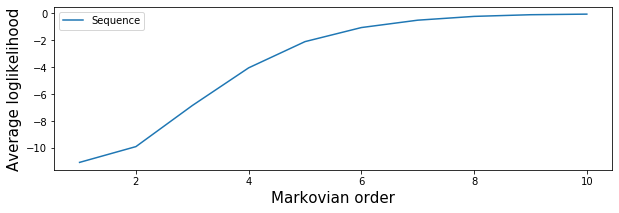

In [15]:
plot_lls_one_seq("sequences/seq_default.txt")

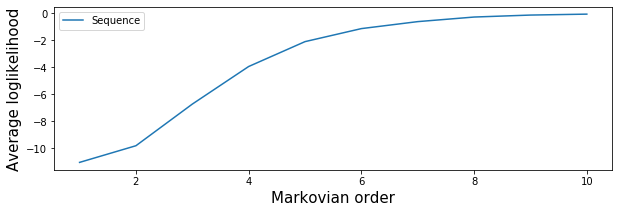

In [16]:
plot_lls_one_seq("sequences/seq_default_2.txt")

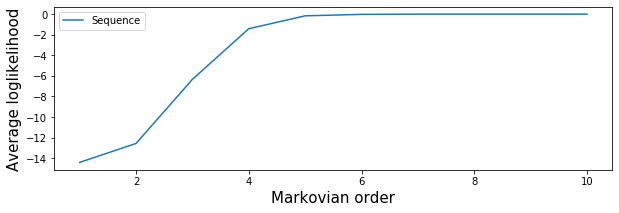

In [17]:
plot_lls_one_seq("sequences/seq_doubleNoise.txt")

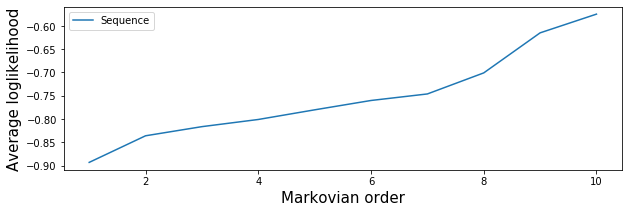

In [18]:
plot_lls_one_seq("sequences/seq_halfNoise.txt")

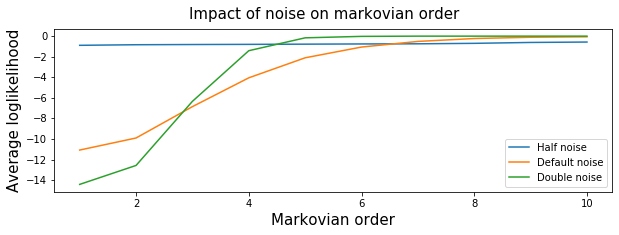

In [19]:
seq_name_to_file = {
  "Half noise":"sequences/seq_halfNoise.txt",
  "Default noise": "sequences/seq_default.txt", 
  "Double noise": "sequences/seq_doubleNoise.txt"
}
fig = plot_lls(seq_name_to_file)
fig.suptitle("Impact of noise on markovian order", fontsize=FONTSIZE)
_ = _

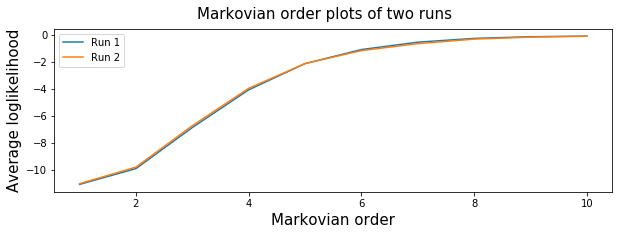

In [20]:
seq_name_to_file = {
  "Run 1": "sequences/seq_default.txt", 
  "Run 2": "sequences/seq_default_2.txt"
}
fig = plot_lls(seq_name_to_file)
fig.suptitle("Markovian order plots of two runs", fontsize=FONTSIZE)
_ = _